# 소셜 네트워크 분석

## 1. 비즈니스 이해

### Background: 어떠한 문제가 존재하는지 상황에 대해 알려진 기사, 논문, 보고서 등을 인용하여 현상을 구체적으로 기술하시기 바랍니다.
- [[열려라 공부] 새 친구 '탐색 시기' 학교폭력도 늘어요](http://news.joins.com/article/21292322)
- 새 학년이 시작되는 3월엔 새로 만난 학생 사이의 갈등도 생기기 마련이다. 송형호 서울 천호중 교사(전 서울시교육청학교폭력담당 파견교사)는 이를 두고 ‘3주의 징크스’라고 불렀다. 개학 직후 1~2주를 지나 3주차가 되면 크고 작은 학교폭력이 시작된다는 설명이다.

### Business Objectives: 기업(혹은 본인)에게 이 현상이 어떠한 이유로 분석을 해야 하는지 추상적(함축적)으로 기술하시기 바랍니다.
- 교우관계 진단을 통해 “따돌림 위기군”을 사전에 파악하고, 학교 내 청소년 교우관계 문제를 해소하는데 도움이 되고자 함.

### Business Success Criteria: 비즈니스 관점에서 분석결과의 성공기준(정량적) 또는 유용한 결과에 대한 기준(정성적)을 설명하십시오.
- 교사 입장에서 교우관계 진단을 통해, 집중적으로 관리해야할 학생군을 파악하고, 학기 초와 비교하여 학기 말에 1명(왕따) 혹은 2명의 학생 네트워크 수를 줄인다.

### Analysis Goals: 비즈니스 목표에 대한 의사결정 지원을 위해 실시하는 분석의 목표를 기술합니다. 
- 학생 네트워크 수의 변화 양상 분석, 소수 학생(1명 혹은 2명간) 네트워크 파악
- ![외톨이 유형](외톨이.jpg)
- 참조문헌(http://cyram.tistory.com/213)

## 2. 데이터의 이해
- 학기초 학생에 대한 설문조사를 실시하여 데이터를 수집함.
- [구글 설문조사 활용](https://goo.gl/forms/QSPhpQmOpWwxT1gS2)
    - 구글 설문: 학기 초 1회 실시(47명)
    - 구글 설문: 학기 중간 1회 실시(47명)
- 데이터 전처리 : 2개 entity를 결합 / 집계


## 3. 데이터 준비

In [2]:
# 네트워크 분석을 지원하는 networkx, pydot 모듈을 설치해야 함.
# conda install -c anaconda networkx
# pip install pydot
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pydot
%matplotlib inline

# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

#### 네트워크 그래프 클래스
- Graph: 이 클래스는 무방향 그래프를 구현합니다. 두 노드 사이의 여러 엣지를 무시합니다. 노드와 노드 사이에 자체 루프 에지를 허용합니다.
- DiGraph: 방향성 그래프, 즉 방향성 엣지를 가진 그래프. 유향 그래프(Graph의 서브 클래스)에 공통의 조작을 제공합니다.
- MultiGraph: 노드 쌍 사이에 여러 무방향 에지를 허용하는 유연한 그래프 클래스입니다. 추가 유연성은 일반적으로 중요하지 않지만 성능 저하를 가져옵니다.
- MultiDiGraph: MultiGraph의 방향성 버전.

In [3]:
# 그래프 유형 선언
G1 = nx.Graph()
G2 = nx.DiGraph()
G3 = nx.MultiGraph()
G4 = nx.MultiDiGraph()

In [4]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'D')
G.add_edge('A', 'C')
G.add_edge('C', 'D')
nx.shortest_path(G, 'A', 'D', weight='weight')

['A', 'B', 'D']

### 데이터 임포트
- 데이터 내 값: NaN은 하나의 열 단위로 존재하는데, 이는 해당 열의 인원이 출석하지 않음을 의미함. -> 제거
- 데이터 내 값: - 은 본인이 본인을 평가할 수 없기 때문에 입력된 것
- 데이터 내 값: 1 은 관계가 있음을 의미
- 데이터 내 값: 0 은 관계가 없음을 의미

In [12]:
# 구글 설문 데이터를 불러옴.
data = pd.read_excel("dreamnetwork.xlsx")
data.head()

,타임스탬프,당신의 이름은 무엇입니까?(실명),꿈의대학 전희정,꿈의대학 홍주연,꿈의대학 이윤서,꿈의대학 최수형,꿈의대학 황재선,꿈의대학 최지영,꿈의대학 신규철,꿈의대학 김용민,꿈의대학 임채윤,꿈의대학 이정우
0,2018-11-26 19:50:53.382,김용민,0,0,0,0,0,0,0,0,1,1
1,2018-11-26 19:53:11.946,전희정,0,1,0,0,0,0,0,0,1,1
2,2018-11-26 19:53:12.313,임채윤,1,0,1,0,0,1,0,1,0,1
3,2018-11-26 19:53:12.768,이윤서,0,0,0,0,0,0,1,0,0,1
4,2018-11-26 19:53:12.975,황재선,0,0,0,0,0,0,1,1,0,1


In [13]:
data = data.ix[:,1:]

C:\Users\HYU\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [14]:
data.set_index("당신의 이름은 무엇입니까?(실명)", inplace = True)

In [15]:
# 설문에 참여를 참여를 안 한 열을 제거함.
data = data.dropna(axis=1) # axis =1 열을 기준으로 삭제
data.head()

,꿈의대학 전희정,꿈의대학 홍주연,꿈의대학 이윤서,꿈의대학 최수형,꿈의대학 황재선,꿈의대학 최지영,꿈의대학 신규철,꿈의대학 김용민,꿈의대학 임채윤,꿈의대학 이정우
당신의 이름은 무엇입니까?(실명),,,,,,,,,,
김용민,0,0,0,0,0,0,0,0,1,1
전희정,0,1,0,0,0,0,0,0,1,1
임채윤,1,0,1,0,0,1,0,1,0,1
이윤서,0,0,0,0,0,0,1,0,0,1
황재선,0,0,0,0,0,0,1,1,0,1


In [16]:
# 우리는 adjacency matrix나 edgelist가 필요함.
# 컬럼명을 변경해야함. ex) 1. 경영학부 10학번 이정우 -> 이정우
data.columns # 우선 컬럼명 조회

Index(['꿈의대학 전희정', '꿈의대학 홍주연', '꿈의대학 이윤서', '꿈의대학 최수형', '꿈의대학 황재선', '꿈의대학 최지영',
       '꿈의대학 신규철', '꿈의대학 김용민', '꿈의대학 임채윤', '꿈의대학 이정우'],
      dtype='object')

In [17]:
data.columns[0].split()

['꿈의대학', '전희정']

In [18]:
# 컬럼명 정리
column_list = []
for i in data.columns:
    column_list.append(i.split()[-1]) # 공백으로 나눠서 나오는 리스트의 맨 마지막 문자열[-1]이 바로 학생이름임.
column_list[:5]

['전희정', '홍주연', '이윤서', '최수형', '황재선']

In [19]:
data.columns = column_list
data.head()

,전희정,홍주연,이윤서,최수형,황재선,최지영,신규철,김용민,임채윤,이정우
당신의 이름은 무엇입니까?(실명),,,,,,,,,,
김용민,0,0,0,0,0,0,0,0,1,1
전희정,0,1,0,0,0,0,0,0,1,1
임채윤,1,0,1,0,0,1,0,1,0,1
이윤서,0,0,0,0,0,0,1,0,0,1
황재선,0,0,0,0,0,0,1,1,0,1


In [20]:
# 엣지리스트 만들기
edgelist = []
for i in data.index:
    for j in data.columns:
        if data.loc[i,j] == 1:
            edgelist.append((i,j))
        else:
            pass
edgelist

[('김용민', '임채윤'),
 ('김용민', '이정우'),
 ('전희정', '홍주연'),
 ('전희정', '임채윤'),
 ('전희정', '이정우'),
 ('임채윤', '전희정'),
 ('임채윤', '이윤서'),
 ('임채윤', '최지영'),
 ('임채윤', '김용민'),
 ('임채윤', '이정우'),
 ('이윤서', '신규철'),
 ('이윤서', '이정우'),
 ('황재선', '신규철'),
 ('황재선', '김용민'),
 ('황재선', '이정우'),
 ('신규철', '이윤서'),
 ('신규철', '황재선'),
 ('홍주연', '이정우'),
 ('이정우', '전희정'),
 ('이정우', '홍주연'),
 ('이정우', '이윤서'),
 ('이정우', '최수형'),
 ('이정우', '황재선'),
 ('이정우', '최지영'),
 ('이정우', '신규철'),
 ('이정우', '김용민'),
 ('이정우', '임채윤'),
 ('최수형', '전희정'),
 ('최수형', '최지영'),
 ('최수형', '이정우'),
 ('최지영', '이정우')]

In [21]:
len(edgelist) # 관계의 수를 확인

31

In [22]:
# 방향성 그래프를 만들고, 우리가 만든 관계 리스트(edgelist)를 입력시킨다.
G = nx.DiGraph()
G.add_edges_from(edgelist)

In [23]:
# node 확인
G.node

NodeView(('김용민', '임채윤', '이정우', '전희정', '홍주연', '이윤서', '최지영', '신규철', '황재선', '최수형'))

In [24]:
# edge 확인
G.edges

OutEdgeView([('김용민', '임채윤'), ('김용민', '이정우'), ('임채윤', '전희정'), ('임채윤', '이윤서'), ('임채윤', '최지영'), ('임채윤', '김용민'), ('임채윤', '이정우'), ('이정우', '전희정'), ('이정우', '홍주연'), ('이정우', '이윤서'), ('이정우', '최수형'), ('이정우', '황재선'), ('이정우', '최지영'), ('이정우', '신규철'), ('이정우', '김용민'), ('이정우', '임채윤'), ('전희정', '홍주연'), ('전희정', '임채윤'), ('전희정', '이정우'), ('홍주연', '이정우'), ('이윤서', '신규철'), ('이윤서', '이정우'), ('최지영', '이정우'), ('신규철', '이윤서'), ('신규철', '황재선'), ('황재선', '신규철'), ('황재선', '김용민'), ('황재선', '이정우'), ('최수형', '전희정'), ('최수형', '최지영'), ('최수형', '이정우')])

### 그래프 그려보기
![색깔조합](named_colors.png)
- [색상참조](https://matplotlib.org/2.0.2/examples/color/named_colors.html)
- [파라미터 참조](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)

- nx.draw(G) : 기본 그리기
- nx.draw_circular(G) : 원 위에 노드 놓기
- nx.draw_graphviz(G) : Graphviz 사용
- nx.draw_kamada_kawai(G) : kamada_kawai 알고리즘
- nx.draw_random(G) : 균등 분포를 이용한 랜덤
- nx.draw_shell(G) : 동심원 위에 노드 놓기
- nx.draw_spectral(G) : 그래프 라플라시안의 고유 벡터 기반
- nx.draw_spring(G) : Fruchterman-Reingold force-directed alg. 기반

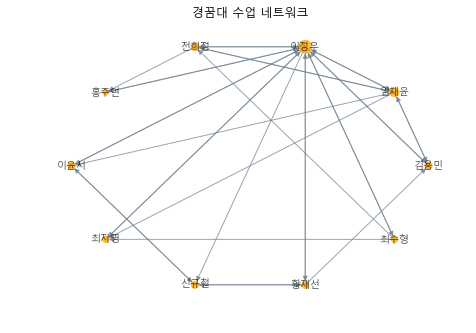

In [25]:
nx.draw_shell(G, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     node_color = "orange", # 노드 색상
                     edge_color = "slategray", # 엣지 색상
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True,# 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('경꿈대 수업 네트워크') # 그래프 제목
plt.savefig('first_network.png') # 파일 저장

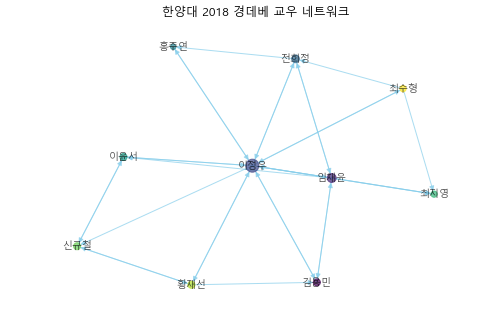

In [26]:
nx.draw_kamada_kawai(G, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     # node_color = "cadetblue", # 노드 색상
                     node_color = range(len(G.nodes)),
                     edge_color = "skyblue", # 엣지 색상
                     # edge_color=colors,
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True, # 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('한양대 2018 경데베 교우 네트워크') # 그래프 제목
plt.savefig('second_network.png') # 파일 저장

## 4. 데이터 분석

### 연결 정도(양적인 영향력)

In [27]:
nx.degree(G)

DiDegreeView({'김용민': 5, '임채윤': 8, '이정우': 17, '전희정': 6, '홍주연': 3, '이윤서': 5, '최지영': 4, '신규철': 5, '황재선': 5, '최수형': 4})

In [28]:
pd.DataFrame(list(nx.degree(G))).sort_values(by=1, ascending = False).head(10)

,0,1
2,이정우,17
1,임채윤,8
3,전희정,6
0,김용민,5
5,이윤서,5
7,신규철,5
8,황재선,5
6,최지영,4
9,최수형,4
4,홍주연,3


### 연결중심성
- 연결 정도를 비율로 계산(상대적 비교)

In [29]:
nx.degree_centrality(G)

{'김용민': 0.5555555555555556,
 '임채윤': 0.8888888888888888,
 '이정우': 1.8888888888888888,
 '전희정': 0.6666666666666666,
 '홍주연': 0.3333333333333333,
 '이윤서': 0.5555555555555556,
 '최지영': 0.4444444444444444,
 '신규철': 0.5555555555555556,
 '황재선': 0.5555555555555556,
 '최수형': 0.4444444444444444}

In [30]:
nx.closeness_centrality(G)

{'김용민': 0.6,
 '임채윤': 0.5625,
 '이정우': 0.9,
 '전희정': 0.5625,
 '홍주연': 0.5294117647058824,
 '이윤서': 0.6,
 '최지영': 0.5625,
 '신규철': 0.6,
 '황재선': 0.5625,
 '최수형': 0.5}

In [31]:
nx.betweenness_centrality(G)

{'김용민': 0.011574074074074072,
 '임채윤': 0.041666666666666664,
 '이정우': 0.6967592592592592,
 '전희정': 0.020833333333333332,
 '홍주연': 0.0,
 '이윤서': 0.04629629629629629,
 '최지영': 0.0,
 '신규철': 0.013888888888888888,
 '황재선': 0.05787037037037036,
 '최수형': 0.0}

![삼각관계](triads.jpg)

- 1-003
- 3-102
- 4-021D
- 6-021C

In [32]:
nx.triadic_census(G)

{'003': 29,
 '012': 25,
 '102': 15,
 '021D': 2,
 '021U': 1,
 '021C': 1,
 '111D': 3,
 '111U': 12,
 '030T': 0,
 '030C': 0,
 '201': 22,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 8,
 '300': 2}

## 5. 분석 결과

In [33]:
print("Number of Nodes : ", nx.number_of_nodes(G))
print("Number of Edges : ", nx.number_of_edges(G))
degreelist = list(pd.DataFrame(list(nx.degree(G))).iloc[:,1])
print("Avg. Node Degree : ", float(sum(degreelist))/nx.number_of_nodes(G))
print("Avg. Path Length : ", nx.average_shortest_path_length(G))

Number of Nodes :  10
Number of Edges :  31
Avg. Node Degree :  6.2
Avg. Path Length :  1.711111111111111


In [34]:
G.nodes

NodeView(('김용민', '임채윤', '이정우', '전희정', '홍주연', '이윤서', '최지영', '신규철', '황재선', '최수형'))

In [35]:
eG = nx.ego_graph(G, "홍주연", radius=1, center=True, undirected=False, distance=None)

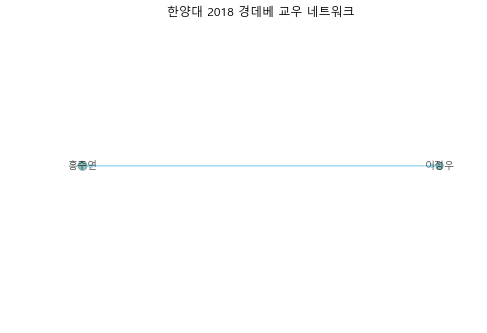

In [36]:
nx.draw_kamada_kawai(eG, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     node_color = "cadetblue", # 노드 색상
                     edge_color = "skyblue", # 엣지 색상
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True, # 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('한양대 2018 경데베 교우 네트워크') # 그래프 제목
plt.savefig('second_network.png') # 파일 저장

## 6. 시사점